In [7]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/eb/f1/828bbccc84a72db960a7d116f55f3f6aec9f5658f5d32ce9db20142d5742/tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/ae/4e/44ce609139065035c56fe570fe7f0ee8d06180c99a424bac588472052c5d/tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)


ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
!pip install tensorflow --no-cache-dir


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip install setuptools


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Step 2: Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [42]:
# Step 1: Define the path to your dataset
dataset_path = "PROJECT/dataset/"  # Local path to dataset

In [43]:
# Step 3: Set important parameters
img_size = (224, 224)  # DenseNet121 expects 224x224 images
batch_size = 32

In [44]:
# Step 4: Preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [61]:
# Step 5: Load train and test datasets
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\DELL\PROJECT\dataset\TRAIN',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\DELL\PROJECT\dataset\test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4803 images belonging to 8 classes.
Found 1198 images belonging to 8 classes.


In [62]:
# Step 6: Load the DenseNet121 model with pretrained weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [64]:
# Step 7: Build the model by adding layers on top of DenseNet121
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust according to the number of classes
])

In [65]:
# Freeze the base model layers to retain pre-trained features
base_model.trainable = False

# Step 8: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
# Step 9: Train the model
epochs = 10  # You can adjust the number of epochs
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 717s 5s/step - accuracy: 0.5605 - loss: 1.3336 - val_accuracy: 0.8038 - val_loss: 0.4960
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 654s 4s/step - accuracy: 0.8181 - loss: 0.4778 - val_accuracy: 0.8072 - val_loss: 0.4736
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 661s 4s/step - accuracy: 0.8610 - loss: 0.3513 - val_accuracy: 0.8406 - val_loss: 0.4177
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 637s 4s/step - accuracy: 0.8851 - loss: 0.3090 - val_accuracy: 0.8414 - val_loss: 0.3852
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 656s 4s/step - accuracy: 0.9056 - loss: 0.2451 - val_accuracy: 0.8456 - val_loss: 0.4312
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 788s 5s/step - accuracy: 0.9249 - loss: 0.1936 - val_accuracy: 0.8472 - val_loss: 0.4654
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 518s 3s/step - accuracy: 0.9358 - loss: 0.1711 - val_accuracy: 0.8539 - val_loss: 0.4275
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 531s 4s/step - accuracy: 0.9443 - loss: 0.1502 - val_accu

In [67]:
# Step 10: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.8519 - loss: 0.4688
Test Accuracy: 85.73%


In [68]:
# Step 11: Save the trained model locally
model.save('./fingerprint_bloodgroup_model_densenet.h5')

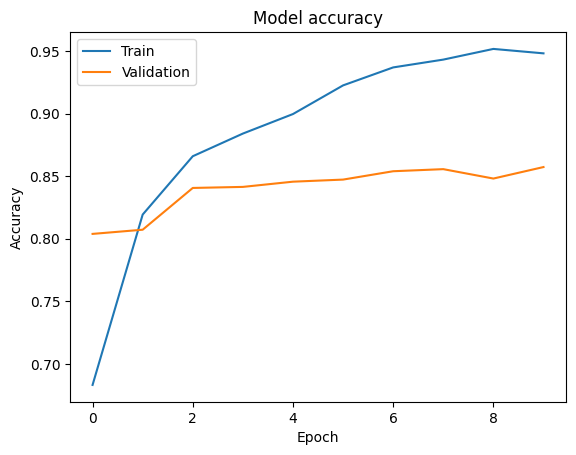

In [69]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

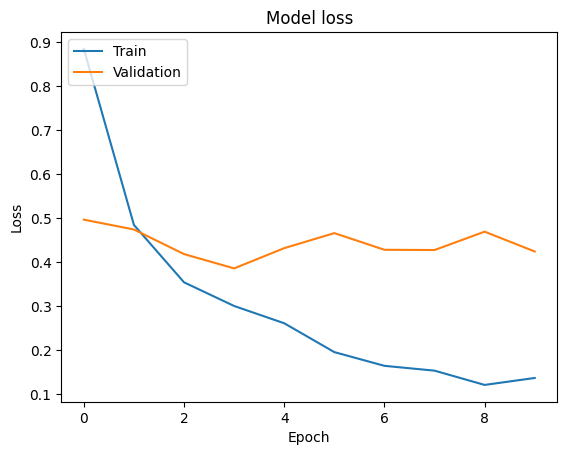

In [70]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [76]:
def predict_blood_group(model, img_path, class_indices):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))  # Load image and resize to model input size
    img_array = img_to_array(img) / 255.0  # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Map the predicted index to the class label
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to map indices to class names
    predicted_class = class_labels[predicted_class_index]

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f"Predicted Blood Group: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class


In [79]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [90]:
# Assuming train_generator is already created and the model is trained
class_indices = train_generator.class_indices  # Get the class indices from the training data generator

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


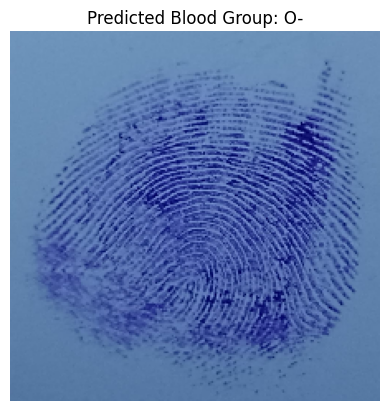

Predicted Blood Group: O-


In [91]:
# Provide the path to the image you want to test
img_path = r"C:\Users\DELL\PROJECT\DATASET\EX1.jpeg"  

# Predict and display the blood group
predicted_blood_group = predict_blood_group(model, img_path, class_indices)
print("Predicted Blood Group:", predicted_blood_group)
